In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [3]:
data=pd.read_csv('blogs.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
data['Data'].apply(lambda x: len(x.split()))

0        910
1        163
2        450
3       2732
4        438
        ... 
1995     782
1996     208
1997     219
1998     469
1999     697
Name: Data, Length: 2000, dtype: int64

In [6]:
data['cleaned_data'] = data['Data'].apply(lambda x: x.strip()) #remove both the leading and the trailing characters
data= data[data['cleaned_data'].astype(bool)] # removes empty strings, because they are considered in Python as False
data['cleaned_data'][0:10]

0    Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2    Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3    Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
5    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
6    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
7    Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
8    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
9    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
Name: cleaned_data, dtype: object

In [14]:

nlp = spacy.load('en_core_web_sm')
one_block = data['cleaned_data'].iloc[20] 
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [15]:
for token in doc_block[0:20]:
    print(f"Word: {token.text}, POS: {token.pos_}")

Word: Xref, POS: PROPN
Word: :, POS: PUNCT
Word: cantaloupe.srv.cs.cmu.edu, POS: PROPN
Word: talk.abortion:120533, POS: PROPN
Word: alt.atheism:53079, POS: PROPN
Word: talk.religion.misc:83551, POS: PROPN
Word: 
, POS: SPACE
Word: Path, POS: PROPN
Word: :, POS: PUNCT
Word: cantaloupe.srv.cs.cmu.edu!das, POS: PROPN
Word: -, POS: PUNCT
Word: news.harvard.edu!noc.near.net!uunet!mcsun!Germany, POS: PROPN
Word: ., POS: PUNCT
Word: EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank, POS: NOUN
Word: 
, POS: SPACE
Word: From, POS: ADP
Word: :, POS: PUNCT
Word: frank@D012S658.uucp, POS: PROPN
Word: (, POS: PUNCT
Word: Frank, POS: PROPN


In [16]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

['EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank',
 'Newsgroups',
 'alt.atheism',
 'talk.religion.misc',
 'Subject',
 'years',
 'say',
 'Date',
 'Lines',
 'References',
 'Posting',
 'article',
 'emarsh@hernes',
 'sun',
 'writes',
 'article',
 'writes',
 'Science',
 'world',
 'has',
 'basis',
 'values',
 'way',
 'wish',
 'is',
 'thing',
 'value',
 'science',
 'said',
 'kick',
 'head',
 'theories',
 'predictions',
 'said',
 'set',
 'cards',
 'like',
 'conclusions',
 'do',
 '#',
 'think',
 'changing',
 'meaning',
 'values',
 'time',
 'backtrack',
 'take',
 'look',
 'word',
 'value',
 'equivalent',
 'return',
 'goods',
 '#',
 'service',
 'material',
 'worth',
 'measured',
 'usefulness',
 'importance',
 'merit',
 'principle',
 'standard',
 'quality',
 '#',
 'considered',
 'meaning',
 'word',
 'quantity',
 'duratation',
 'tone',
 'rest',
 'darkness',
 'lightness',
 'color',
 'quality',
 'speech',
 'speech',
 'sound',
 'context',
 'system',
 'definition',
 'seems',
 'fit',
 'ter

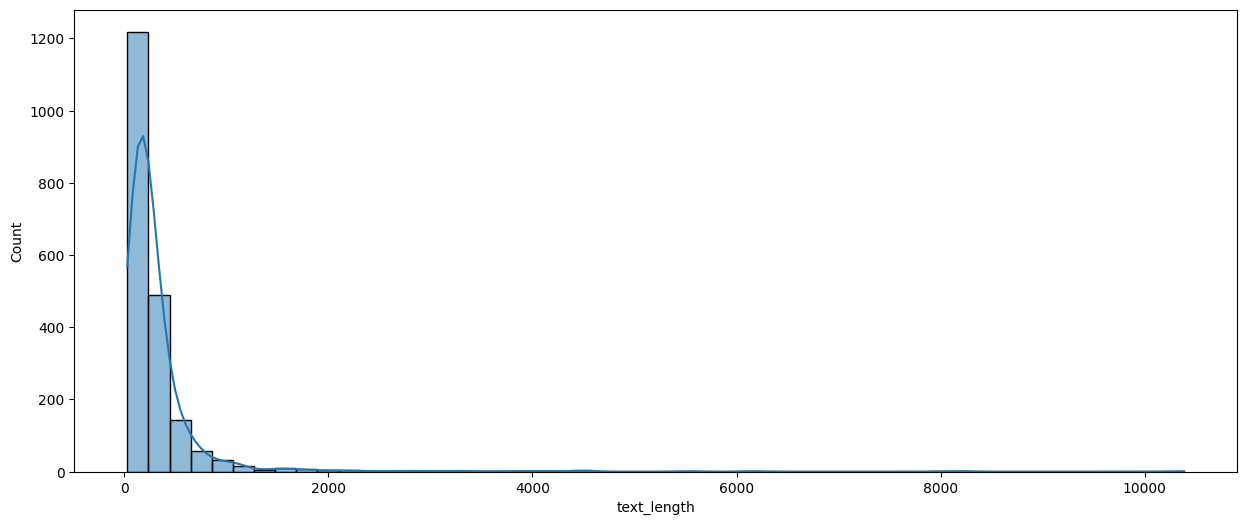

In [19]:
data['text_length'] = data['Data'].apply(lambda x: len(x.split()))

plt.figure(figsize=(15,6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.show()

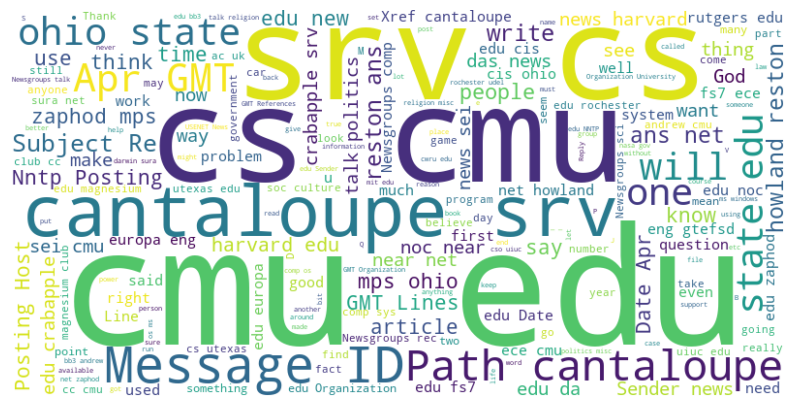

In [21]:
all_text = ' '.join(data['Data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [24]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punktab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\revan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\revan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error loading punktab: Package 'punktab' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\revan\AppData\Roaming\nltk_data...


True

In [25]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text
clean = lambda x: clean_text(x)

<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\revan\AppData\Local\Temp\ipykernel_23376\300761773.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\revan\AppData\Local\Temp\ipykernel_23376\300761773.py:6: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [26]:
data['Data']
data.Data

0       Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1       Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2       Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3       Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4       Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
                              ...                        
1995    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997    Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1999    Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...
Name: Data, Length: 2000, dtype: object

In [27]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [28]:
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [29]:
data['cleaned_text'] = data['Data'].apply(preprocess_text)
data

,Data,Labels,cleaned_data,text_length,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,910,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,163,newsgroup altath path cantaloupesrvcscmueducra...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,450,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,2732,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,438,xref cantaloupesrvcscmuedu altatheism53485 tal...
...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,782,xref cantaloupesrvcscmuedu talkabortion120945 ...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,208,xref cantaloupesrvcscmuedu talkreligionmisc837...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,219,xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,469,xref cantaloupesrvcscmuedu talkreligionmisc836...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf_vectorizer = TfidfVectorizer()

In [33]:
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [34]:
tfidf_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 254914 stored elements and shape (2000, 47426)>

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['Labels'], test_size=0.2, random_state=42)

In [41]:
naive_bayes_classifier = MultinomialNB()

In [42]:
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt',
       'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'sci.electronics', 'rec.sport.baseball',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc', 'sci.crypt',
       'soc.religion.christian', 'rec.motor

In [43]:
accuracy_score(y_test, y_pred)

0.815

In [44]:
classification_report(y_test, y_pred)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.52      0.94      0.67        18\n           comp.graphics       0.67      0.89      0.76        18\n comp.os.ms-windows.misc       0.79      0.86      0.83        22\ncomp.sys.ibm.pc.hardware       0.86      0.72      0.78        25\n   comp.sys.mac.hardware       0.83      0.90      0.86        21\n          comp.windows.x       1.00      0.72      0.84        25\n            misc.forsale       1.00      0.56      0.71        18\n               rec.autos       0.89      0.89      0.89        18\n         rec.motorcycles       0.83      0.94      0.88        16\n      rec.sport.baseball       0.90      1.00      0.95        18\n        rec.sport.hockey       0.94      1.00      0.97        15\n               sci.crypt       0.78      0.95      0.86        19\n         sci.electronics       0.65      0.69      0.67        16\n                 sci.med       0.88      0.88      0.88    

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sample_text = "This blog post is not so really informative and waste off time."
scores = sid.polarity_scores(sample_text)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\revan\AppData\Roaming\nltk_data...


In [47]:
scores

{'neg': 0.218, 'neu': 0.782, 'pos': 0.0, 'compound': -0.4703}

In [49]:
def categorize_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Data'].apply(categorize_sentiment)
print(data[['Data', 'Sentiment']])

                                                   Data Sentiment
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive
...                                                 ...       ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Positive
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  Positive
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  Negative

[2000 rows x 2 columns]


In [51]:
sentiment_by_category = data.groupby(['Labels', 'Sentiment']).size().unstack()

In [52]:
sentiment_by_category

Sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,42.0,1.0,57.0
comp.graphics,13.0,4.0,83.0
comp.os.ms-windows.misc,24.0,2.0,74.0
comp.sys.ibm.pc.hardware,21.0,NaN,79.0
comp.sys.mac.hardware,24.0,3.0,73.0
comp.windows.x,20.0,2.0,78.0
misc.forsale,7.0,8.0,85.0
rec.autos,27.0,1.0,72.0
rec.motorcycles,30.0,2.0,68.0


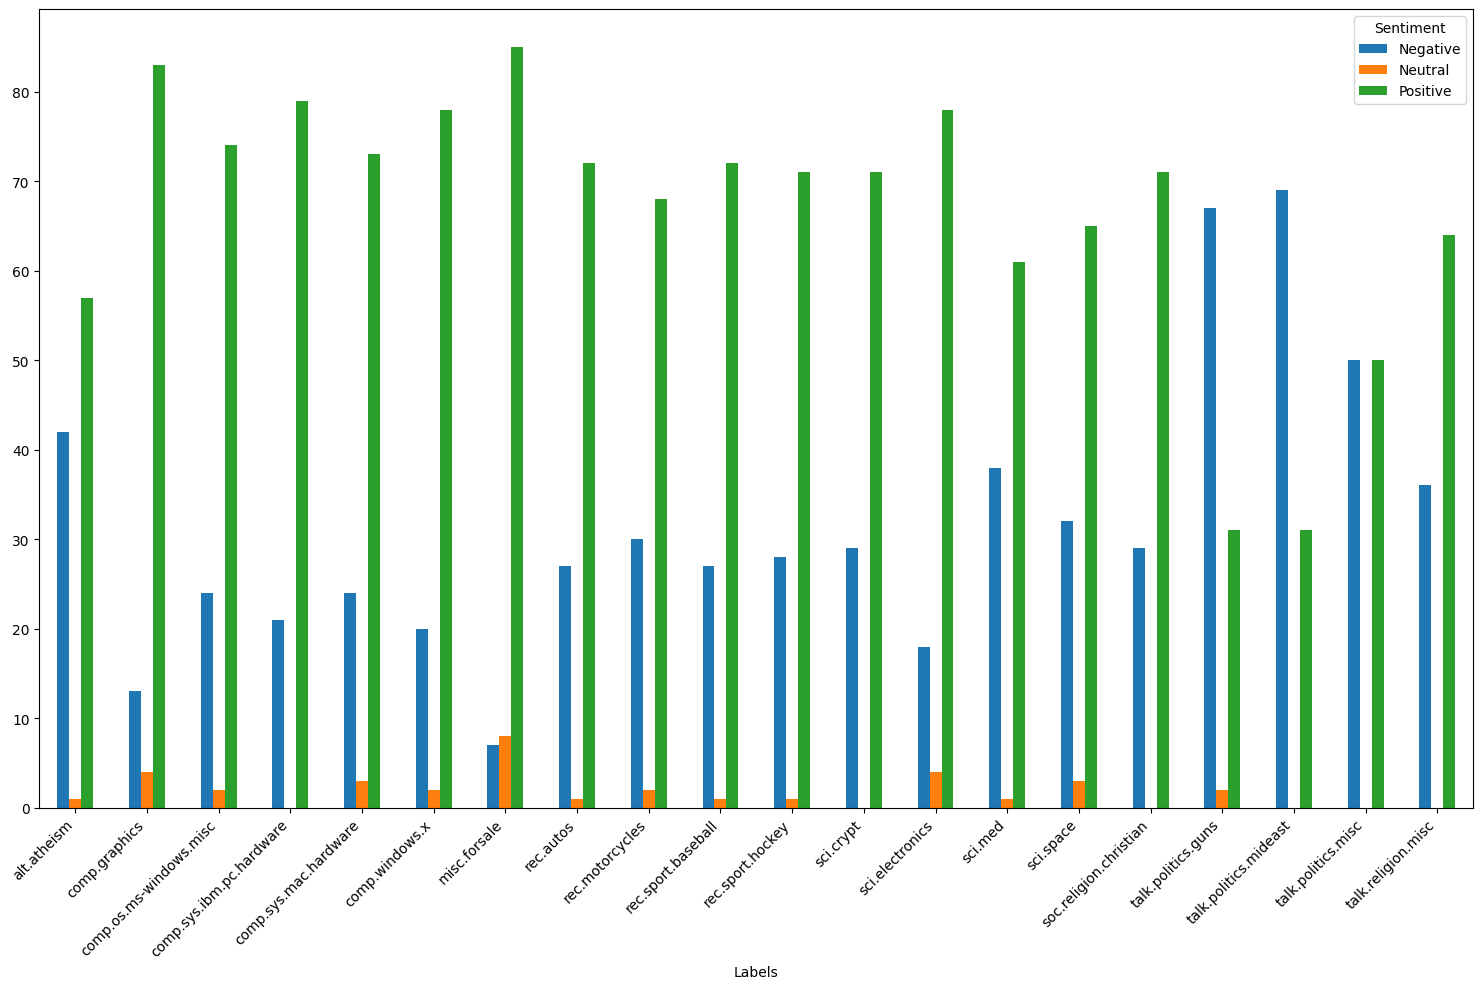

In [53]:
sentiment_by_category.plot(kind='bar', figsize=(15,10))
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [55]:
for category in sentiment_by_category.index:
  total_count = sentiment_by_category.loc[category].sum()
  positive_percentage = (sentiment_by_category.loc[category, 'Positive'] / total_count) * 100 if total_count > 0 else 0
  negative_percentage = (sentiment_by_category.loc[category, 'Negative'] / total_count) * 100 if total_count > 0 else 0
  neutral_percentage = (sentiment_by_category.loc[category, 'Neutral'] / total_count) * 100 if total_count > 0 else 0
  print(f"- Category: {category}")
  print(f"  - Positive: {positive_percentage:.2f}%")
  print(f"  - Negative: {negative_percentage:.2f}%")
  print(f"  - Neutral: {neutral_percentage:.2f}%")

- Category: alt.atheism
  - Positive: 57.00%
  - Negative: 42.00%
  - Neutral: 1.00%
- Category: comp.graphics
  - Positive: 83.00%
  - Negative: 13.00%
  - Neutral: 4.00%
- Category: comp.os.ms-windows.misc
  - Positive: 74.00%
  - Negative: 24.00%
  - Neutral: 2.00%
- Category: comp.sys.ibm.pc.hardware
  - Positive: 79.00%
  - Negative: 21.00%
  - Neutral: nan%
- Category: comp.sys.mac.hardware
  - Positive: 73.00%
  - Negative: 24.00%
  - Neutral: 3.00%
- Category: comp.windows.x
  - Positive: 78.00%
  - Negative: 20.00%
  - Neutral: 2.00%
- Category: misc.forsale
  - Positive: 85.00%
  - Negative: 7.00%
  - Neutral: 8.00%
- Category: rec.autos
  - Positive: 72.00%
  - Negative: 27.00%
  - Neutral: 1.00%
- Category: rec.motorcycles
  - Positive: 68.00%
  - Negative: 30.00%
  - Neutral: 2.00%
- Category: rec.sport.baseball
  - Positive: 72.00%
  - Negative: 27.00%
  - Neutral: 1.00%
- Category: rec.sport.hockey
  - Positive: 71.00%
  - Negative: 28.00%
  - Neutral: 1.00%
- Category: 

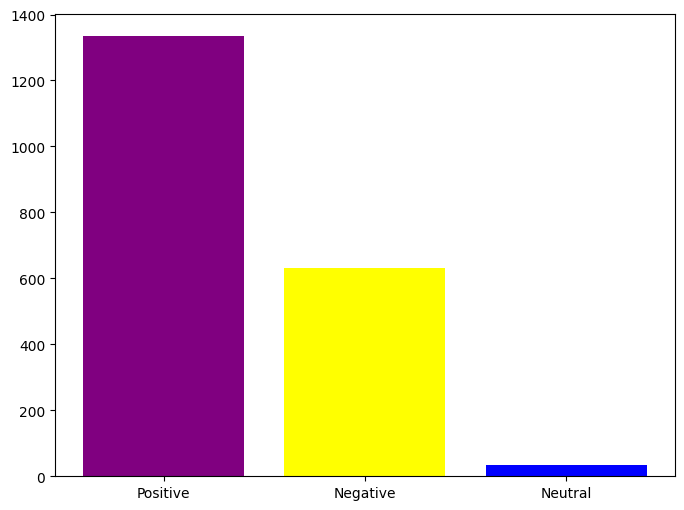

In [57]:
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['purple','yellow','blue'] )
plt.show()

In [58]:
classification_report(y_test, y_pred)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.52      0.94      0.67        18\n           comp.graphics       0.67      0.89      0.76        18\n comp.os.ms-windows.misc       0.79      0.86      0.83        22\ncomp.sys.ibm.pc.hardware       0.86      0.72      0.78        25\n   comp.sys.mac.hardware       0.83      0.90      0.86        21\n          comp.windows.x       1.00      0.72      0.84        25\n            misc.forsale       1.00      0.56      0.71        18\n               rec.autos       0.89      0.89      0.89        18\n         rec.motorcycles       0.83      0.94      0.88        16\n      rec.sport.baseball       0.90      1.00      0.95        18\n        rec.sport.hockey       0.94      1.00      0.97        15\n               sci.crypt       0.78      0.95      0.86        19\n         sci.electronics       0.65      0.69      0.67        16\n                 sci.med       0.88      0.88      0.88    